# COGS 108 - Final Project (Man vs Women salary)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X ] YES - make available
* [  ] NO - keep private

# Overview

For our project, we wanted to explore the social issue of the gender wage gap in modern society. Many studies and reports show that women earn less salary than men in nearly all occupations, in our case, we would like to focus on finding the relationships between employment proportions of genders and the ratio of each gender’s salary. We expected that gender tendency/gender bias in particular occupations influences gender income. We used two datasets which include the income and proportion of male and female workers in different occupations in the United States. As we compared the gender income and occupations distribution, we found that the employment of males is higher than the employment of females and female median weekly wage is lower than male, but there is no significant relationship between the proportion of female workers and female wage to male wage.

# Names
- Siyuan Zhang
- Juanyu Liu
- Jie Wei
- Yingshan Xie
- Hang Shi


<a id='research_question'></a>
# Research Question

Would the employment proportion of male and female influence the ratio of male’s salary to female’s salary? 


<a id='background'></a>

## Background & Prior Work


Income inequality has always been an issue around the world. Even though many celebrities, advocates, and organizations are championing for more even salaries between males and females in the United States, yet women’s incomes are lower than men’s regardless of their occupation features. The Institue for Women's Policy Research published a report in 2019 that there are just five occupations in which women's median weekly wage are higher than men's but 120 occupations in which they are lower (The Gender Wage Gap by Occupation 2019).


Multiple factors could lead to income inequality between genders. Occupational segregation, for example, which is caused by more men occupying positions with higher salaries, impacts the gap between female and male’s wages. Study shows that income inequality has several adverse effects. For the big picture, income inequality between genders obstruct economic growth of a country. 


References (include links):
- 1) https://www.americanprogress.org/issues/women/reports/2020/03/24/482141/quick-facts-gender-wage-gap/

- 2) https://iwpr.org/iwpr-issues/employment-and-earnings/the-gender-wage-gap-by-occupation-2019/

- 3) https://www.sciencedirect.com/science/article/abs/pii/S0264999317301153


# Hypothesis


1) As one occupation’s employment rate of one gender is greater than another gender's, its income rate is directly proportional. 

2) If one occupation employs more heavily towards one gender, that gender’s income of this specific occupation would be higher than the other gender. 

# Dataset(s)

Dataset #1
- Dataset Name: 
  - adult.csv
- Link to the dataset: 
  - https://www.kaggle.com/johnolafenwa/us-census-data?select=adult-training.csv
- Number of observations:
  - 48842
- Description:
  - This dataset contains detailed information of US adult income in 2017 and its relating social factors that may contribute to wage inequality, such as age, education, marital status, race, and so forth. This dataset consists of categorical and continuous features. For this project, we would mainly focus on the 14 different occupations between gender, and income ranges that are greater than 50K (>50K) and less than and equal to 50k (<=50k). 
- Noteble columns for each observation:
  - Age
  - Occupation
  - gender
  - hours-per-week
  - income



Dataset #2
- Dataset Name:
  - data.csv
- Link to the dataset:
  - https://www.bls.gov/cps/cpsaat39.htm
- Number of observations:
  - 608
- Description:
  - While dataset #1 offers us an overview of the gender income issue, this dataset contains data for median weekly earnings of full-time wage and salary workers by detailed occupation and sex in 2020. We can calculate the proportions of female and male workers and identify their relationships with female wage to male wage through the data, which helps us to decide whether reject our hypothesis or not. Therefore, we would not combine these two datasets into the same dataframe, but we plan to compare graphs and see if the analysis are similar.
- Noteble columns for each observation:
  - Occupation
  - Total number of workers	
  - Total Median weekly wage	
  - Male number of workers
  - Male Median weekly wage	
  - Female number of workers	
  - Female Median weekly wage	


We are going to analyze these two datasets separately, then compare the their analyzed results.

# Setup

In [1]:
#import numpy to store numreical value
import numpy as np
#import panda to read csv file
import pandas as pd
#import seaborn to visualize
import seaborn as sns
##import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind,chisquare,normaltest
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# read csv file and save as dataframe
info_of_workers = pd.read_csv('adult.csv') 
# This data contains datailed infomation of each worker.
occupation_summary = pd.read_csv('data.csv')
# This data contains the summary of each occupation, including different female and male wages.


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
info_of_workers # This step shows all data of adult.csv

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
info_of_workers.shape # determine rows and columns in info_of_workers

(48842, 15)

In [4]:
info_of_workers =info_of_workers.drop(columns=[ 'workclass','fnlwgt', 'education','educational-num','marital-status', 'relationship', 'race','capital-gain','capital-loss','native-country'])
info_of_workers # Drop all unneccessary columns

,age,occupation,gender,hours-per-week,income
0,25,Machine-op-inspct,Male,40,<=50K
1,38,Farming-fishing,Male,50,<=50K
2,28,Protective-serv,Male,40,>50K
3,44,Machine-op-inspct,Male,40,>50K
4,18,?,Female,30,<=50K
...,...,...,...,...,...
48837,27,Tech-support,Female,38,<=50K
48838,40,Machine-op-inspct,Male,40,>50K
48839,58,Adm-clerical,Female,40,<=50K
48840,22,Adm-clerical,Male,20,<=50K


In [5]:
info_of_workers['occupation'].unique() 
# take a look at the unique values in 'occupation' column, and found that '?' means there are  missing values.

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [6]:
info_of_workers['gender'].unique() 
# take a look at the unique values in 'gender' column

array(['Male', 'Female'], dtype=object)

In [7]:
info_of_workers['hours-per-week'].unique() 
# take a look at the unique values in 'hours-per-week' column

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [8]:
info_of_workers['income'].unique() 
# take a look at the unique values in 'income' column

array(['<=50K', '>50K'], dtype=object)

In [9]:
info_of_workers = info_of_workers[info_of_workers.occupation != '?']
info_of_workers # remove the rows with '?'

,age,occupation,gender,hours-per-week,income
0,25,Machine-op-inspct,Male,40,<=50K
1,38,Farming-fishing,Male,50,<=50K
2,28,Protective-serv,Male,40,>50K
3,44,Machine-op-inspct,Male,40,>50K
5,34,Other-service,Male,30,<=50K
...,...,...,...,...,...
48837,27,Tech-support,Female,38,<=50K
48838,40,Machine-op-inspct,Male,40,>50K
48839,58,Adm-clerical,Female,40,<=50K
48840,22,Adm-clerical,Male,20,<=50K


In [10]:
info_of_workers = info_of_workers.reset_index(drop=True) # rearrange index order
info_of_workers

,age,occupation,gender,hours-per-week,income
0,25,Machine-op-inspct,Male,40,<=50K
1,38,Farming-fishing,Male,50,<=50K
2,28,Protective-serv,Male,40,>50K
3,44,Machine-op-inspct,Male,40,>50K
4,34,Other-service,Male,30,<=50K
...,...,...,...,...,...
46028,27,Tech-support,Female,38,<=50K
46029,40,Machine-op-inspct,Male,40,>50K
46030,58,Adm-clerical,Female,40,<=50K
46031,22,Adm-clerical,Male,20,<=50K


In [11]:
info_of_workers['occupation'].unique() # double check if there is '?' in this colomns or not.
## finish cleaning data for 'adult.csv'.

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

Continue working on cleaning any unneccessary data for 'data.csv'

In [12]:
occupation_summary ## take a look at the data

,HOUSEHOLD DATA\nANNUAL AVERAGES\n39. Median weekly earnings of full-time wage and salary workers by detailed occupation and sex,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,[Numbers in thousands],NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Occupation,2020,NaN,NaN,NaN,NaN,NaN
3,NaN,Total,NaN,Men,NaN,Women,NaN
4,NaN,Number of workers,Median weekly earnings,Number of workers,Median weekly earnings,Number of workers,Median weekly earnings
...,...,...,...,...,...,...,...
603,Pumping station operators,17,–,17,–,0,–
604,Refuse and recyclable material collectors,70,680,64,698,6,–
605,Other material moving workers,46,–,41,–,5,–
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
occupation_summary = occupation_summary.iloc[5:,:] # remove first 5 rows of data
occupation_summary

,HOUSEHOLD DATA\nANNUAL AVERAGES\n39. Median weekly earnings of full-time wage and salary workers by detailed occupation and sex,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Total, full-time wage and salary workers","110,387",$984,"60,911","$1,082","49,476",$891
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Management, professional, and related occupations","50,023","1,356","24,090","1,578","25,933","1,164"
9,"Management, business, and financial operations...","20,811","1,461","11,082","1,667","9,729","1,274"
...,...,...,...,...,...,...,...
603,Pumping station operators,17,–,17,–,0,–
604,Refuse and recyclable material collectors,70,680,64,698,6,–
605,Other material moving workers,46,–,41,–,5,–
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns = ['Occupation','Total number of workers','Total Median weekly wage','Male number of workers', 
               'Male Median weekly wage','Female number of workers','Female Median weekly wage']
occupation_summary.columns = columns
occupation_summary ## rename the columns

,Occupation,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Total, full-time wage and salary workers","110,387",$984,"60,911","$1,082","49,476",$891
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Management, professional, and related occupations","50,023","1,356","24,090","1,578","25,933","1,164"
9,"Management, business, and financial operations...","20,811","1,461","11,082","1,667","9,729","1,274"
...,...,...,...,...,...,...,...
603,Pumping station operators,17,–,17,–,0,–
604,Refuse and recyclable material collectors,70,680,64,698,6,–
605,Other material moving workers,46,–,41,–,5,–
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
occupation_summary = occupation_summary.dropna(how = 'any')
occupation_summary
 # drop any rows that have any missing values with NaN

,Occupation,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage
6,"Total, full-time wage and salary workers","110,387",$984,"60,911","$1,082","49,476",$891
8,"Management, professional, and related occupations","50,023","1,356","24,090","1,578","25,933","1,164"
9,"Management, business, and financial operations...","20,811","1,461","11,082","1,667","9,729","1,274"
10,Management occupations,"13,517","1,541","7,770","1,737","5,747","1,347"
11,Chief executives,"1,157","2,402",794,"2,712",363,"2,051"
...,...,...,...,...,...,...,...
601,"Packers and packagers, hand",436,582,205,604,231,544
602,Stockers and order fillers,"1,058",593,714,602,345,576
603,Pumping station operators,17,–,17,–,0,–
604,Refuse and recyclable material collectors,70,680,64,698,6,–


In [16]:
occupation_summary = occupation_summary.set_index('Occupation') 
occupation_summary.head()# take a look how the data looks now

,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage
Occupation,,,,,,
"Total, full-time wage and salary workers","110,387",$984,"60,911","$1,082","49,476",$891
"Management, professional, and related occupations","50,023","1,356","24,090","1,578","25,933","1,164"
"Management, business, and financial operations occupations","20,811","1,461","11,082","1,667","9,729","1,274"
Management occupations,"13,517","1,541","7,770","1,737","5,747","1,347"
Chief executives,"1,157","2,402",794,"2,712",363,"2,051"


In [17]:
def standardize_data(string): # create a function
    string = string.replace(',', '') # remove any ',' in data
    string = string.replace('$', '') # remove any '$' in data
    if string.isnumeric():
        string = int(string) # Cast to integer if what's left seems appropriate
    else:
        string = np.nan # otherwise, consider input was probably ill-formed, return nan
    return string

occupation_summary = occupation_summary.applymap(standardize_data) # apply the transformation using the function
occupation_summary = occupation_summary.dropna(how = 'any') # drop any missing data
occupation_summary.head() # take a look how the function works

,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage
Occupation,,,,,,
"Total, full-time wage and salary workers",110387,984.0,60911,1082.0,49476,891.0
"Management, professional, and related occupations",50023,1356.0,24090,1578.0,25933,1164.0
"Management, business, and financial operations occupations",20811,1461.0,11082,1667.0,9729,1274.0
Management occupations,13517,1541.0,7770,1737.0,5747,1347.0
Chief executives,1157,2402.0,794,2712.0,363,2051.0


In [18]:
def calculate_proportion(value, total): # create a function to calculate proportion
    proportion = []
    for i in range(len(value)):
        proportion.append(value[i]/total[i])
    return proportion

In [19]:
# calculate the female proportion of each occupation using function crate above
female_proportion = calculate_proportion(occupation_summary['Female number of workers'], occupation_summary['Total number of workers'])
# calculate the male prortion
male_proportion = calculate_proportion(occupation_summary['Male number of workers'], occupation_summary['Total number of workers'])
# calculate the ratio between female verse male
female_to_male = calculate_proportion(occupation_summary['Female Median weekly wage'], occupation_summary['Male Median weekly wage'])

In [20]:
occupation_summary['Proportion of female worker'] = female_proportion # add new colums into the data
occupation_summary['Proportion of male worker'] = male_proportion
occupation_summary['Female wage to Male wage'] = female_to_male
occupation_summary # finish working on cleaning 'data.csv'

,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage,Proportion of female worker,Proportion of male worker,Female wage to Male wage
Occupation,,,,,,,,,
"Total, full-time wage and salary workers",110387,984.0,60911,1082.0,49476,891.0,0.448205,0.551795,0.823475
"Management, professional, and related occupations",50023,1356.0,24090,1578.0,25933,1164.0,0.518422,0.481578,0.737643
"Management, business, and financial operations occupations",20811,1461.0,11082,1667.0,9729,1274.0,0.467493,0.532507,0.764247
Management occupations,13517,1541.0,7770,1737.0,5747,1347.0,0.425168,0.574832,0.775475
Chief executives,1157,2402.0,794,2712.0,363,2051.0,0.313742,0.686258,0.756268
...,...,...,...,...,...,...,...,...,...
"Bus drivers, transit and intercity",146,783.0,89,774.0,57,791.0,0.390411,0.609589,1.021964
Driver/sales workers and truck drivers,2592,896.0,2409,916.0,183,666.0,0.070602,0.929398,0.727074
"Laborers and freight, stock, and material movers, hand",1587,650.0,1268,672.0,319,595.0,0.201008,0.798992,0.885417


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [21]:
info_of_workers #show data

,age,occupation,gender,hours-per-week,income
0,25,Machine-op-inspct,Male,40,<=50K
1,38,Farming-fishing,Male,50,<=50K
2,28,Protective-serv,Male,40,>50K
3,44,Machine-op-inspct,Male,40,>50K
4,34,Other-service,Male,30,<=50K
...,...,...,...,...,...
46028,27,Tech-support,Female,38,<=50K
46029,40,Machine-op-inspct,Male,40,>50K
46030,58,Adm-clerical,Female,40,<=50K
46031,22,Adm-clerical,Male,20,<=50K


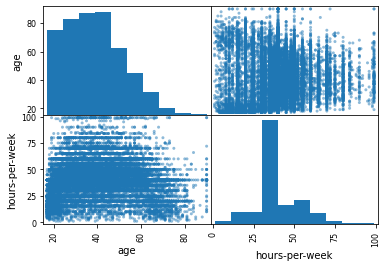

In [22]:
fig = pd.plotting.scatter_matrix(info_of_workers) 
# We use scatter matrix to see how data distribute
# We found that outliers might exists in our data

<AxesSubplot:xlabel='gender', ylabel='count'>

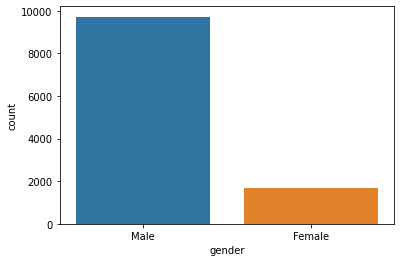

In [23]:

income_greater_50K = info_of_workers[info_of_workers['income'] == '>50K']
# We are going to only compare the gender income in section '>50', since we only need to know whether male or female has higher income

sns.countplot(x =income_greater_50K['gender'])
 ## compare the employment of male and female 
 

The employment rate of male is much higher than the employment rate of female.

In [24]:
number_of_female = len(income_greater_50K[income_greater_50K['gender']=='Female'])  ###added###
number_of_male = len(income_greater_50K[income_greater_50K['gender']=='Male'])
number_of_male/number_of_female # get the actual data of number of male vs number of female

5.742621015348288

Based on the calculation, we can see that the employment of male is is higher than the employment of female.

In [25]:
total_number_workers = len(income_greater_50K['gender'])
female_proportion = number_of_female/total_number_workers
female_proportion 


0.1483102784100858

In [26]:
male_proportion = number_of_male/total_number_workers
male_proportion

0.8516897215899142

<AxesSubplot:xlabel='income', ylabel='count'>

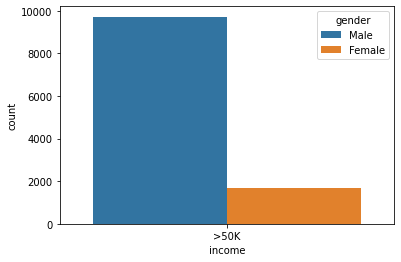

In [27]:
sns.countplot(x = 'income',hue='gender',data =income_greater_50K)

In this plot, we can see that the proportion of male is higher than female. Thus, we find that there might be a relationship between employment rate of gender and income. We are going to use z test to confirm whether there is a real relationship between employment rate of gender and income in the next step.

# z-test


In [28]:
more_than_50k_male = info_of_workers[info_of_workers['income'] == '>50K'][info_of_workers['gender'] == 'Male'].shape[0]
more_than_50k_female = info_of_workers[info_of_workers['income'] == '>50K'][info_of_workers['gender'] == 'Female'].shape[0]

male_count = info_of_workers[info_of_workers['gender']=='Male'].shape[0]
female_count = info_of_workers[info_of_workers['gender']=='Female'].shape[0]

z_test, z_test_p_val = proportions_ztest(
    np.array([more_than_50k_male, more_than_50k_female]), 
    np.array([male_count, female_count]),
    alternative = 'larger')

z_test_p_val


C:\Users\carax\AppData\Local\Temp/ipykernel_32060/1896010076.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  more_than_50k_male = info_of_workers[info_of_workers['income'] == '>50K'][info_of_workers['gender'] == 'Male'].shape[0]
C:\Users\carax\AppData\Local\Temp/ipykernel_32060/1896010076.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  more_than_50k_female = info_of_workers[info_of_workers['income'] == '>50K'][info_of_workers['gender'] == 'Female'].shape[0]


0.0

Since p-value = 0.0, reject the null hypothesis and conclude that the proportion of male workers whose income is more than 50k is significantly greater than that proportion of female workers.


<AxesSubplot:xlabel='count', ylabel='occupation'>

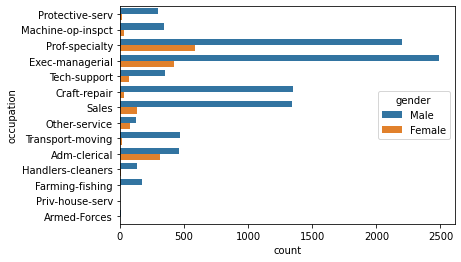

In [29]:
sns.countplot(y= 'occupation', hue = 'gender',data = income_greater_50K)    
# Barplot to see how occupations distributed 

We are going to choose two occupations 'Prof-specialty' and 'Adm-Clerical' to make an analysis for hypothesis 2, since the number of male and female in these two occupations have a clear difference. According to the hypothesis 2, these data will support the hypothesis if the statement 'gender's income of this specific occupation is higher than the other gender is true, when the one occupation empolys more heavily toward one gender' is true.

In [30]:

prof_specialty = income_greater_50K[income_greater_50K['occupation']=='Prof-specialty']
prof_specialty # get the data of occupation 'Prof-specialty', while male in this occupation is more heavily toward female

,age,occupation,gender,hours-per-week,income
5,63,Prof-specialty,Male,32,>50K
16,40,Prof-specialty,Male,45,>50K
31,36,Prof-specialty,Male,40,>50K
35,65,Prof-specialty,Male,50,>50K
40,28,Prof-specialty,Female,36,>50K
...,...,...,...,...,...
45947,37,Prof-specialty,Male,45,>50K
45988,39,Prof-specialty,Male,45,>50K
45991,46,Prof-specialty,Female,22,>50K
46007,34,Prof-specialty,Male,60,>50K


<AxesSubplot:xlabel='income', ylabel='count'>

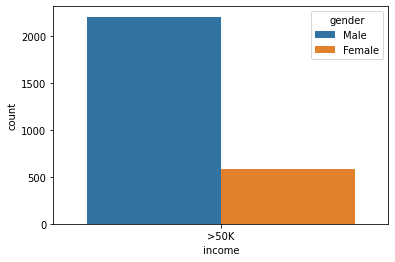

In [31]:
sns.countplot(x = 'income', hue='gender',data = prof_specialty) 

Based on this plot, we find that the number of male whose occupation is prof_specialty is greater than female. Thus, there is a high chance that male whose occupation is prof_specialty have higher income than female.

In [32]:
adm_clerical = income_greater_50K[income_greater_50K['occupation']=='Adm-clerical']
adm_clerical # get the data of occupation 'Adm-clerical', while female in this occupation is more heavily toward male

,age,occupation,gender,hours-per-week,income
144,40,Adm-clerical,Male,45,>50K
386,33,Adm-clerical,Female,40,>50K
399,39,Adm-clerical,Male,40,>50K
405,32,Adm-clerical,Female,40,>50K
521,51,Adm-clerical,Male,40,>50K
...,...,...,...,...,...
45616,44,Adm-clerical,Male,50,>50K
45626,52,Adm-clerical,Male,44,>50K
45750,39,Adm-clerical,Male,40,>50K
45829,36,Adm-clerical,Female,20,>50K


##

<AxesSubplot:xlabel='income', ylabel='count'>

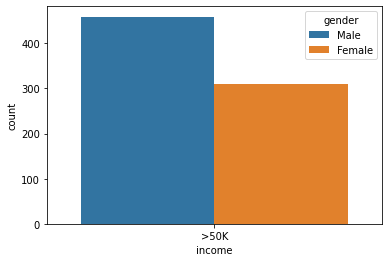

In [33]:
sns.countplot(x = 'income', hue='gender',data = adm_clerical)

Based on this plot, we find that the number of female whose occupation is adm_clerical is slightly lower than male in section '>50K', although female in this occupation is more heavily toward male . Thus, there is no data support hypothesis 2 in this occupation data.

###################### EDA FOR occupation_summary'data.csv' #################

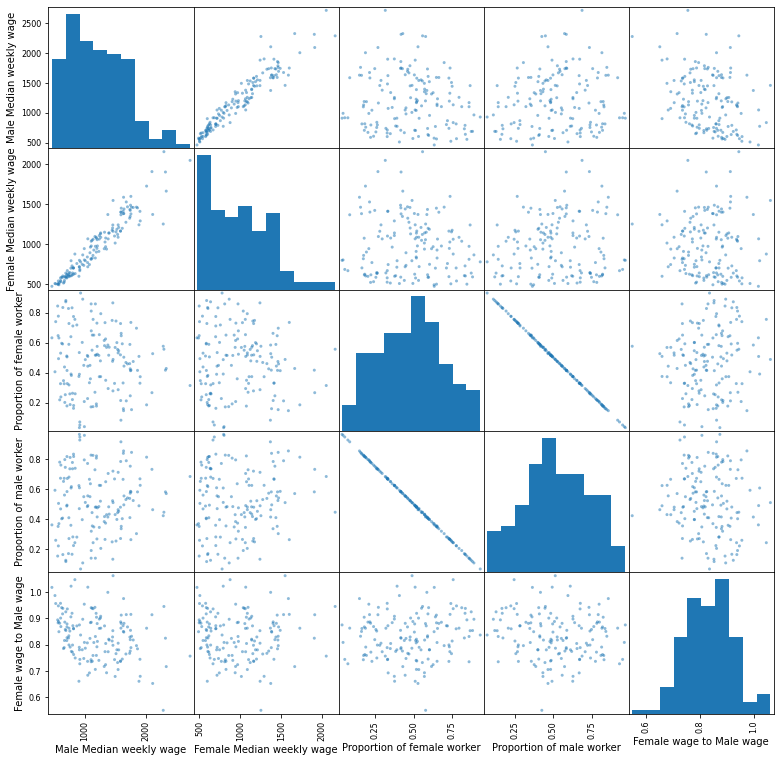

In [34]:
drop_columns = occupation_summary.drop(columns = ['Total number of workers','Total Median weekly wage','Male number of workers','Female number of workers'])
fig_data = pd.plotting.scatter_matrix(
    drop_columns,
    figsize  = [13, 13],
    
)

for ax in fig_data.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
# We use scatter matrix to see how data distribute

In [35]:
occupation_summary


,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage,Proportion of female worker,Proportion of male worker,Female wage to Male wage
Occupation,,,,,,,,,
"Total, full-time wage and salary workers",110387,984.0,60911,1082.0,49476,891.0,0.448205,0.551795,0.823475
"Management, professional, and related occupations",50023,1356.0,24090,1578.0,25933,1164.0,0.518422,0.481578,0.737643
"Management, business, and financial operations occupations",20811,1461.0,11082,1667.0,9729,1274.0,0.467493,0.532507,0.764247
Management occupations,13517,1541.0,7770,1737.0,5747,1347.0,0.425168,0.574832,0.775475
Chief executives,1157,2402.0,794,2712.0,363,2051.0,0.313742,0.686258,0.756268
...,...,...,...,...,...,...,...,...,...
"Bus drivers, transit and intercity",146,783.0,89,774.0,57,791.0,0.390411,0.609589,1.021964
Driver/sales workers and truck drivers,2592,896.0,2409,916.0,183,666.0,0.070602,0.929398,0.727074
"Laborers and freight, stock, and material movers, hand",1587,650.0,1268,672.0,319,595.0,0.201008,0.798992,0.885417


In [36]:
sum_occupation_female = sum(occupation_summary['Female number of workers'])
sum_occupation_female
# caluculate infomation of total female employment
sum_occupation_male = sum(occupation_summary['Male number of workers'])
# get the infomation of total male employment
sum_number_of_male_vs_female= sum_occupation_male/sum_occupation_female
sum_number_of_male_vs_female # calculate the employment of male vs female


1.1579344316387377

Based on the calculation, we can see that total employment of male in all occupation is one time as female.

<AxesSubplot:>

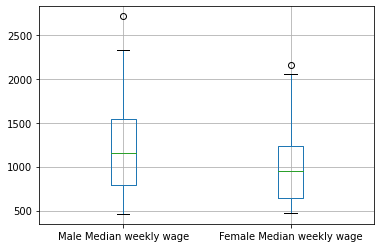

In [37]:
occupation_summary.boxplot(column = ['Male Median weekly wage', 'Female Median weekly wage'])
## we are going to compare the variables 'Male Median weekly wage' and 'Female Median weekly wage'.

In this plot, we can see that the female median weekly wage is clearly lower than male. We are going to calculate the acutal values to analyse the weekly gender wage, as well as the t test and plots.


Text(0.5, 1.0, 'Median Weekly Wage by Gender')

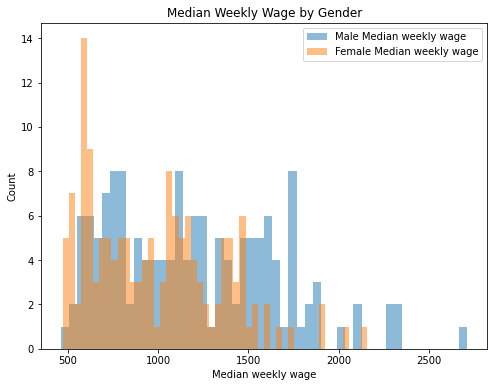

In [38]:
plt.figure(figsize=(8,6))
plt.hist(occupation_summary['Male Median weekly wage'], bins=50, alpha=0.5, label='Male Median weekly wage')
plt.hist(occupation_summary['Female Median weekly wage'], bins=50, alpha=0.5, label='Female Median weekly wage')
plt.xlabel('Median weekly wage')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Median Weekly Wage by Gender')

Based on the plot, an outliner exists when median weekly wage over 2500 dollars. This might affect the accuracy of analysis. We might consider testing whether this outliner has true effect to the data in the future.

# T-test

In [39]:
income_male = occupation_summary['Male Median weekly wage'].values
income_female = occupation_summary['Female Median weekly wage'].values
avg_in_m = income_male.mean()
avg_in_fe = income_female.mean()
t_val,p_val = ttest_ind(a = income_male, b = income_female)
if p_val < 0.01:
    print('There is a significant difference in male and female median weekly wage')
else:
    print('There is no significant difference ')

There is a significant difference in male and female median weekly wage


In [40]:
total_female_weekly_wage = sum(occupation_summary['Female Median weekly wage'])
# calculate the total weekly wage of female
total_male_weekly_wage= sum(occupation_summary['Male Median weekly wage'])
total_male_weekly_wage
# calculate the total weekly wage of female
mean_female_weekly_wage = total_female_weekly_wage/len(occupation_summary)
mean_male_weekly_wage = total_male_weekly_wage/(len(occupation_summary))

mean_weekly_wage_male_vs_female = mean_male_weekly_wage/mean_female_weekly_wage
mean_weekly_wage_male_vs_female

1.217691673313775

Based on the plots, calculations and t test, we find that the mean weekly male wage is about one time as female as the employment of male is higher than female. Thus, we think that there is a relationship between employment of gender and their income. This result of analysis can be used to support hypothesis 1.

# Linear Regression

In [41]:
x = occupation_summary['Proportion of female worker'].values
y = occupation_summary['Female wage to Male wage'].values
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size= 0.2, random_state=0)
regression = LinearRegression()
regression.fit(x_train.reshape(-1,1), y_train)
print("intercept: ", regression.intercept_, "coefficient: ", regression.coef_)

intercept:  0.806830689283993 coefficient:  [0.03940462]


Since the coefficient is equal about 0.04, the data shows the relationship between 'proportion of female worker' and 'female wage to male wage' is positive with very small effect.

# OLS Regression Results

In [42]:
X = occupation_summary['Proportion of female worker']
Y = occupation_summary['Female wage to Male wage']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Female wage to Male wage   R-squared:                       0.014
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     2.111
Date:                      Tue, 07 Dec 2021   Prob (F-statistic):              0.148
Time:                              21:35:30   Log-Likelihood:                 154.38
No. Observations:                       150   AIC:                            -304.8
Df Residuals:                           148   BIC:                            -298.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.8088      0.017     46.257      0.000       0.774       0.843
Proportion of female worker     0.0485      0.033      1.453      0.148      -0.017       0.114
==============================================================================
Omnibus:                        0.535   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.224
Skew:                          -0.026   Prob(JB):                        0.894
Kurtosis:                       3.182   Cond. No.                         5.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are going to randomly select couple occupations to analyze in order to find out whether the data support the hypothesis 2 or not.

In [43]:
occupation_10 = occupation_summary[1:11].reset_index()# get 10 occupations in the data
occupation_10

,Occupation,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage,Proportion of female worker,Proportion of male worker,Female wage to Male wage
0,"Management, professional, and related occupations",50023,1356.0,24090,1578.0,25933,1164.0,0.518422,0.481578,0.737643
1,"Management, business, and financial operations...",20811,1461.0,11082,1667.0,9729,1274.0,0.467493,0.532507,0.764247
2,Management occupations,13517,1541.0,7770,1737.0,5747,1347.0,0.425168,0.574832,0.775475
3,Chief executives,1157,2402.0,794,2712.0,363,2051.0,0.313742,0.686258,0.756268
4,General and operations managers,983,1453.0,702,1541.0,281,1241.0,0.285860,0.714140,0.805321
5,Marketing managers,483,1537.0,199,1732.0,284,1435.0,0.587992,0.412008,0.828522
6,Sales managers,495,1794.0,332,1896.0,163,1411.0,0.329293,0.670707,0.744198
7,Computer and information systems managers,703,2018.0,516,2091.0,187,1910.0,0.266003,0.733997,0.913439
8,Financial managers,1228,1492.0,603,1880.0,624,1242.0,0.508143,0.491042,0.660638
9,Human resources managers,264,1644.0,70,1748.0,194,1599.0,0.734848,0.265152,0.914760


In [44]:
Management_occupations = occupation_10[occupation_10['Occupation'] == 'Management occupations']
Management_occupations  # get infomation of 'Management occupation'

,Occupation,Total number of workers,Total Median weekly wage,Male number of workers,Male Median weekly wage,Female number of workers,Female Median weekly wage,Proportion of female worker,Proportion of male worker,Female wage to Male wage
2,Management occupations,13517,1541.0,7770,1737.0,5747,1347.0,0.425168,0.574832,0.775475


In [45]:
number_male_management_vs_female = Management_occupations['Male number of workers']/Management_occupations['Female number of workers']
number_male_management_vs_female

2    1.35201
dtype: float64

We can see that number of male who is in 'management occupations' is about one time as female. We are going to compare gender income in this position.

In [46]:
wage_management_male_vs_female = Management_occupations['Male Median weekly wage']/ Management_occupations['Female Median weekly wage']
wage_management_male_vs_female

2    1.289532
dtype: float64

we found that weekly wage of male is higer than female.

In [47]:
Chief_executives = occupation_10[occupation_10['Occupation'] == 'Chief executives']
number_male_chief_vs_female = Chief_executives['Male number of workers']/Chief_executives['Female number of workers']
number_male_chief_vs_female


3    2.187328
dtype: float64

We can see that number of male who is in 'Chief_executives' is about twice as female. We are going to compare gender income in this position.

In [48]:
wage_cheif_male_vs_female = Chief_executives['Male Median weekly wage']/ Chief_executives['Female Median weekly wage']
wage_cheif_male_vs_female

3    1.322282
dtype: float64

We find that male's wage is higher than female's in this position as the employment of male is heavier than female.

Based on the analyses of these two positions, we find that the proportion of gender employment in an occupation might have effect to gender wage.

# Ethics & Privacy

The datasets we will be using for this project are publicly available online and everyone on the internet has access to it. Thus, we search datasets on open source dataset resource websites, which are Kaggle (https://www.kaggle.com) and U.S. Bureau of Labor Statistics Latest Numbers (https://www.bls.gov). The licenses of our datasets indicate that the data is opened for public domain. The dataset #1 we used did not contain any sensitive personal information in each observation, everything is anonymous, especially the names of each worker are not mentioned at all. The dataset #2 is a collective data of male, female, and in total of wage and occupation, the individual's data are added and stored in groups of sex, occupation, and wage, so there should be no risk of exposing personal privacy. 

We believe the potential biases should be small in our datasets because our datasets were collected from both genders and did not exclude particular populations. For instance, dataset #1 not only collected data from different genders but also included workers who are from different races and nationalities in the United States. Moreover, we don't think any of our findings and analysis will be problematic if used by others since gender bias is an unsolved social issue for a long period. Our project would only arouse people's attention toward the wage inequality between gender and occupation.

# Conclusion & Discussion

Since the analysis (including t-test, 2-proportion Z test, linear regression, etc.) of two data supports our hypothesis 1, there is a high chance that a relationship exists between the employment proportion of gender and their wage. In addition, in the example analysis of two data, there are results of those examples exists conflicts. Thus, we are unable to determine whether there is a relationship between the employment proportion of one gender in an occupation and their wage. Since an outliner exists in the plots, we use to generate the second dataset. we think there is more work we need to do in the future in order to increase the accuracy of the results. We might consider testing whether this outliner has true effect to the data in the future.

Limitation: As we mentioned in the Background, multiple factors could lead to income inequality between genders. For our project, we mainly focus on the employment proportion of gender and proportion of gender’s income. Indeed, the U.S is an open and pluralistic country, race might be a sub influence factor under gender. We have “race” and “nationality” columns in our dataset #1, but we did not analyze these parts of data which might be one possible limitation in our project. For future study, we should further research how races of males and females affect the occupation’s employment proportion and the wage gap.

Impact on society: according to our results, proportion of male workers’ income that’s greater than 50,000 is significantly greater than that of female workers’ income. Multiple reasons might lead to this conclusion. Besides the income inequality between the two gender, it is also plasible that for the occupations with higher incomes, more males are employed than females. These are serious social issues that require justification and our attention. Our project again proved the existing inequality, but more importantly, it is a great start for further investigation into this topic.



# Team Contributions

Siyuan Zhang: Data set research, data cleaning, data analysis

Hang Shi: data set research, data cleaning, data analysis

Jie Wei: overview, background research, dataset description, ethics & privacy

Juanyu liu: ppt formation, data finding

Yingshan Xie: data cleaning, data analysis, conclusion